## Detección de Comunidades

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms import community
import numpy as np
import stringdb

### Funciones para realizar la visualización de comunidades

In [4]:
# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=200,
        node_color=node_colors,
        with_labels=True,
        font_size=5,
        font_color="black",
    )

Lectura del grafo

In [5]:
# grafo 200 genes
# Read the CSV file using pandas
df = pd.read_csv('grafo_200_genes.csv', sep='\t')

# Create a graph from the CSV data
G = nx.from_pandas_edgelist(df, 'preferredName_A', 'preferredName_B')

Plot de las comunidades

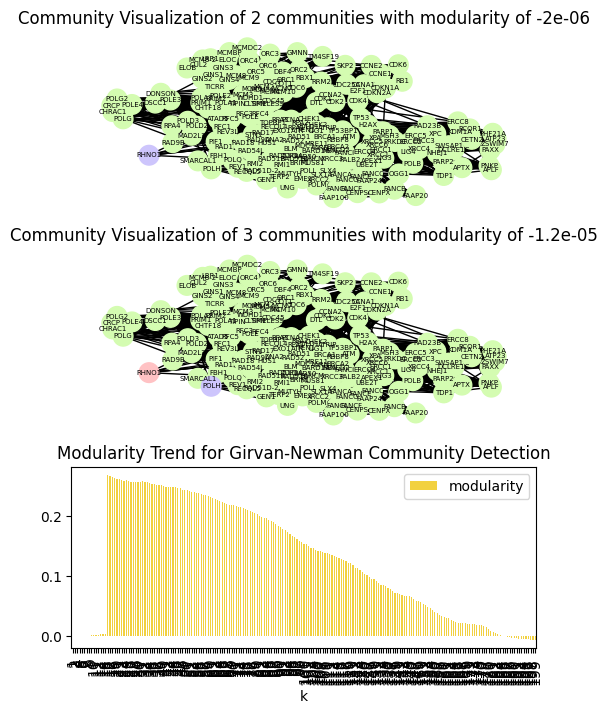

In [6]:
# Modularity -> measures the strength of division of a network into modules
communities = list(nx.community.girvan_newman(G))
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)

fig, ax = plt.subplots(3, figsize=(6, 8))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[1], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()

Estudio de cada comunidad

In [26]:
# Cojo las tres comunidades mayores, la cuarta comunidad de dos genes la desecho.
c1 = communities[1][0]
c2 = communities[1][1]
c3 = communities[1][2]

# Busco información de los genes de cada comunidad

ac1 = stringdb.get_string_ids(c1, species=9606)
ac2 = stringdb.get_string_ids(c2, species=9606)
ac3 = stringdb.get_string_ids(c3, species=9606)

In [42]:
ac1['annotation'][0]

'Paragranulin; Secreted protein that acts as a key regulator of lysosomal function and as a growth factor involved in inflammation, wound healing and cell proliferation. Regulates protein trafficking to lysosomes and, also the activity of lysosomal enzymes. Facilitates also the acidification of lysosomes, causing degradation of mature CTSD by CTSB. In addition, functions as wound-related growth factor that acts directly on dermal fibroblasts and endothelial cells to promote division, migration and the formation of capillary-like tubule structures (By similarity). Also promotes epithelia [...] '

In [39]:
ac1['annotation'][1]

'Transitional endoplasmic reticulum ATPase; Necessary for the fragmentation of Golgi stacks during mitosis and for their reassembly after mitosis. Involved in the formation of the transitional endoplasmic reticulum (tER). The transfer of membranes from the endoplasmic reticulum to the Golgi apparatus occurs via 50-70 nm transition vesicles which derive from part-rough, part-smooth transitional elements of the endoplasmic reticulum (tER). Vesicle budding from the tER is an ATP-dependent process. The ternary complex containing UFD1, VCP and NPLOC4 binds ubiquitinated proteins and is neces [...] '

In [40]:
ac1['annotation'][2]

'Phospholipid-transporting ATPase ABCA7; Catalyzes the translocation of specific phospholipids from the cytoplasmic to the extracellular/lumenal leaflet of membrane coupled to the hydrolysis of ATP. Transports preferentially phosphatidylserine over phosphatidylcholine. Plays a role in lipid homeostasis and macrophage- mediated phagocytosis. Binds APOA1 and may function in apolipoprotein-mediated phospholipid efflux from cells. May also mediate cholesterol efflux. May regulate cellular ceramide homeostasis during keratinocyte differentiation. Involved in lipid raft organization and CD1D  [...] '

In [43]:
ac1['annotation'][3]

'Sequestosome-1; Autophagy receptor required for selective macroautophagy (aggrephagy). Functions as a bridge between polyubiquitinated cargo and autophagosomes. Interacts directly with both the cargo to become degraded and an autophagy modifier of the MAP1 LC3 family. Along with WDFY3, involved in the formation and autophagic degradation of cytoplasmic ubiquitin-containing inclusions (p62 bodies, ALIS/aggresome-like induced structures). Along with WDFY3, required to recruit ubiquitinated proteins to PML bodies in the nucleus. May regulate the activation of NFKB1 by TNF-alpha, nerve gro [...] '

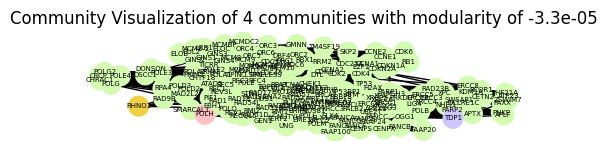

In [13]:
visualize_communities(G, communities[2], 1)

In [ ]:
# Ejecutar el algoritmo de Newman-Girvan
comp = nx.community.girvan_newman(G)

# Obtener las comunidades resultantes
communities = tuple(sorted(c) for c in next(comp))

# Imprimir cuantas comunidades se han creado
print("Se han creado " + str(len(communities)) + " comunidades")

# Visualizar el grafo con colores segÃºn las comunidades
colors = [0] * len(G.nodes)
for i, community in enumerate(communities):
    for node in community:
        colors[list(G.nodes()).index(node)] = i

pos = nx.spring_layout(G) 
nx.draw(G, pos, node_color=colors, node_size = 60)
plt.show()

Se han creado 3 comunidades


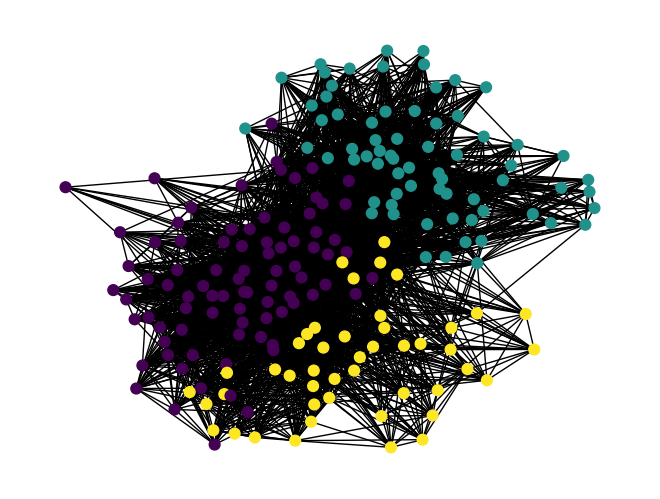

In [30]:

# Obtener las comunidades resultantes
# communities = tuple(sorted(c) for c in next(comp))

# Ejecutar el algoritmo de greedy_modularity_communities
communities = nx.community.greedy_modularity_communities(G)

# Imprimir cuantas comunidades se han creado
print("Se han creado " + str(len(communities)) + " comunidades")

# Visualizar el grafo con colores segÃºn las comunidades
colors = [0] * len(G.nodes)
for i, community in enumerate(communities):
    for node in community:
        colors[list(G.nodes()).index(node)] = i

pos = nx.spring_layout(G) 
nx.draw(G, pos, node_color=colors, node_size = 60)
plt.show()

Se han creado 1 comunidades


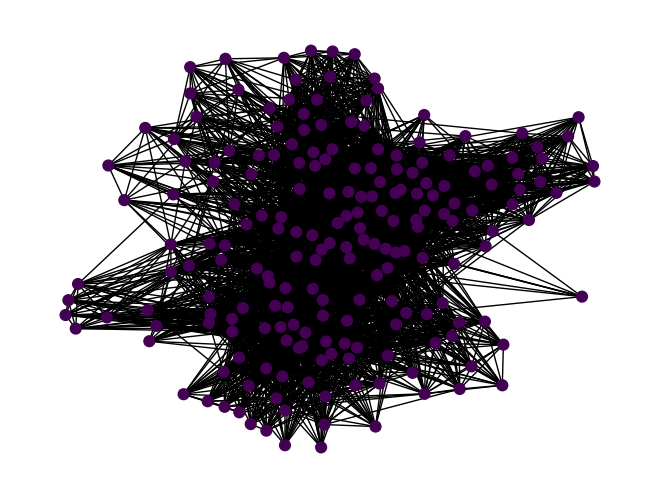

In [25]:
# Ejecutar el algoritmo de label_propagation_communities
communities = nx.community.label_propagation_communities(G)

# Obtener las comunidades resultantes
# communities = tuple(sorted(c) for c in next(comp))

# Imprimir cuantas comunidades se han creado
print("Se han creado " + str(len(communities)) + " comunidades")

# Visualizar el grafo con colores segÃºn las comunidades
colors = [0] * len(G.nodes)
for i, community in enumerate(communities):
    for node in community:
        colors[list(G.nodes()).index(node)] = i

pos = nx.spring_layout(G) 
nx.draw(G, pos, node_color=colors, node_size = 60)
plt.show()

Se han creado 2 comunidades


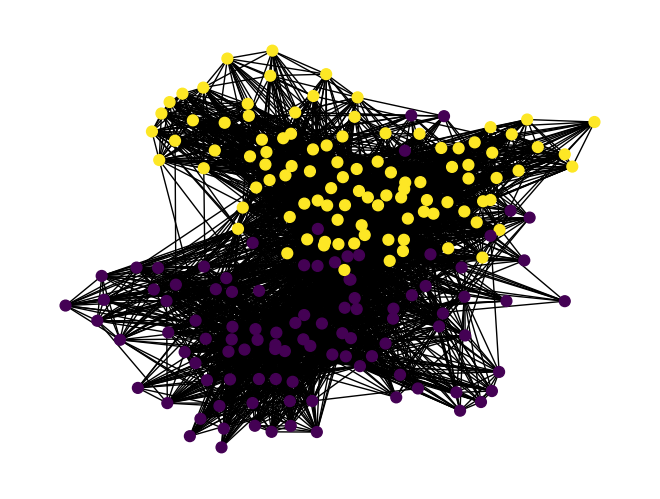

In [28]:
# Ejecutar el algoritmo de kernighan_lin_bisection
communities = nx.community.kernighan_lin_bisection(G)

# Obtener las comunidades resultantes
# communities = tuple(sorted(c) for c in next(comp))

# Imprimir cuantas comunidades se han creado
print("Se han creado " + str(len(communities)) + " comunidades")

# Visualizar el grafo con colores segÃºn las comunidades
colors = [0] * len(G.nodes)
for i, community in enumerate(communities):
    for node in community:
        colors[list(G.nodes()).index(node)] = i

pos = nx.spring_layout(G) 
nx.draw(G, pos, node_color=colors, node_size = 60)
plt.show()

In [40]:
comunity1 = communities[0]
comunity2 = communities[1]
comunity3 = communities[2]

In [50]:
enrichment_df= stringdb.get_enrichment(comunity3, species=9606)

## por p-value y por fdr (false discovery rate)
filter_enrichment = enrichment_df[(enrichment_df['p_value']<=5e-10) & (enrichment_df['fdr']<=5e-10)]
# seleccionamos las columnas que queremos presentar
filter_df = filter_enrichment[["category", 'number_of_genes', "p_value", "fdr", "description"]]

cate = ['DISEASES', 'Function','HPO', 'WikiPathways']
filter_df = filter_df[filter_df["category"].isin(cate)]

filter_df=filter_df.sort_values('number_of_genes', ascending=False)
filter_df.to_csv('enriquecimiento_comunidad3_ordenado.csv', sep='\t', index=False)